<a href="https://colab.research.google.com/github/gauravsri2001/Action-Planner/blob/main/research_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [69]:
df = pd.read_json('dataset.jsonl', lines=True)
df.head()

,paper_id,_pdf_hash,_source_hash,_source_name,metadata,discipline,abstract,body_text,bib_entries,ref_entries
0,2001.00542,NaN,2cf7d91955338de8806cedfaad463edaa03b353e,2001.00542.gz,"{'id': '2001.00542', 'submitter': 'Uro\v{s} Tk...",Physics,"{'section': 'Abstract', 'text': ' Compared to...","[{'section': '', 'sec_number': '-1', 'sec_type...",{},{'336749f9-1c00-42ce-b19d-ccbc2650785b': {'cap...
1,2001.00552,NaN,cd9ad8a0cbb2f1bb1a6f67be4b3c7d0e434e58b3,2001.00552.gz,"{'id': '2001.00552', 'submitter': 'Uro\v{s} Tk...",Physics,"{'section': 'Abstract', 'text': ' Pure liquid...","[{'section': '', 'sec_number': '-1', 'sec_type...",{},{'9e47e1d7-6266-43a5-82de-d13c566b1a83': {'cap...
2,2001.01128,NaN,2720ef9c27a2fd932d68cc901136ad880b22af32,2001.01128.gz,"{'id': '2001.01128', 'submitter': 'Ilan Ben-Ba...",Statistics,"{'section': 'Abstract', 'text': ' Web applica...","[{'section': 'INTRODUCTION', 'sec_number': '1'...",{'fd348bb730364500beec84e6d07f229a9ac881c5': {...,{'d81d90e9-cf08-44d2-942c-1bfffe7144a4': {'cap...
3,2001.01237,NaN,16d4646f55552b42dc8260150707b6ef96ae9070,2001.01237.gz,"{'id': '2001.01237', 'submitter': 'Ligong Bian...",Physics,"{'section': 'Abstract', 'text': ' We study st...","[{'section': 'Supplemental material', 'sec_num...",{'b7617d845bed30eeb2da9879ad21dc34280655c4': {...,{'eda44882-5b51-4828-9084-b95846977966': {'cap...
4,2001.01618,NaN,ec6d66a2df60dd2975aab31d10b83a08542f7d45,2001.01618.gz,"{'id': '2001.01618', 'submitter': 'Sudipta Pau...",Statistics,"{'section': 'Abstract', 'text': ' Differentia...","[{'section': 'Introduction', 'sec_number': '1'...",{'ff4a579d4abedc40931f2b06ecbeab82c4489299': {...,{'cf732af0-acbf-423b-9a8b-0e642579cff1': {'cap...


In [70]:
# To check for null values in the entire dataset:
df.isnull().sum()

paper_id          0
_pdf_hash       795
_source_hash      0
_source_name      0
metadata          0
discipline        0
abstract          0
body_text         0
bib_entries       0
ref_entries       0
dtype: int64

In [71]:
df.shape

(795, 10)

In [72]:
print(df.dtypes)


paper_id        float64
_pdf_hash       float64
_source_hash     object
_source_name     object
metadata         object
discipline       object
abstract         object
body_text        object
bib_entries      object
ref_entries      object
dtype: object


In [73]:
# Checking for duplicates based on 'paper_id' column
df.duplicated(subset=['paper_id']).sum()

# Checking for duplicates based on '_source_name' column
df.duplicated(subset=['_source_name']).sum()


0

In [74]:
#Dropping the _pdf_hash column
df = df.drop(columns=['_pdf_hash'])


In [75]:
df.head()

,paper_id,_source_hash,_source_name,metadata,discipline,abstract,body_text,bib_entries,ref_entries
0,2001.00542,2cf7d91955338de8806cedfaad463edaa03b353e,2001.00542.gz,"{'id': '2001.00542', 'submitter': 'Uro\v{s} Tk...",Physics,"{'section': 'Abstract', 'text': ' Compared to...","[{'section': '', 'sec_number': '-1', 'sec_type...",{},{'336749f9-1c00-42ce-b19d-ccbc2650785b': {'cap...
1,2001.00552,cd9ad8a0cbb2f1bb1a6f67be4b3c7d0e434e58b3,2001.00552.gz,"{'id': '2001.00552', 'submitter': 'Uro\v{s} Tk...",Physics,"{'section': 'Abstract', 'text': ' Pure liquid...","[{'section': '', 'sec_number': '-1', 'sec_type...",{},{'9e47e1d7-6266-43a5-82de-d13c566b1a83': {'cap...
2,2001.01128,2720ef9c27a2fd932d68cc901136ad880b22af32,2001.01128.gz,"{'id': '2001.01128', 'submitter': 'Ilan Ben-Ba...",Statistics,"{'section': 'Abstract', 'text': ' Web applica...","[{'section': 'INTRODUCTION', 'sec_number': '1'...",{'fd348bb730364500beec84e6d07f229a9ac881c5': {...,{'d81d90e9-cf08-44d2-942c-1bfffe7144a4': {'cap...
3,2001.01237,16d4646f55552b42dc8260150707b6ef96ae9070,2001.01237.gz,"{'id': '2001.01237', 'submitter': 'Ligong Bian...",Physics,"{'section': 'Abstract', 'text': ' We study st...","[{'section': 'Supplemental material', 'sec_num...",{'b7617d845bed30eeb2da9879ad21dc34280655c4': {...,{'eda44882-5b51-4828-9084-b95846977966': {'cap...
4,2001.01618,ec6d66a2df60dd2975aab31d10b83a08542f7d45,2001.01618.gz,"{'id': '2001.01618', 'submitter': 'Sudipta Pau...",Statistics,"{'section': 'Abstract', 'text': ' Differentia...","[{'section': 'Introduction', 'sec_number': '1'...",{'ff4a579d4abedc40931f2b06ecbeab82c4489299': {...,{'cf732af0-acbf-423b-9a8b-0e642579cff1': {'cap...


In [76]:
#Dropping the _source_hash
df = df.drop(columns=['_source_hash'])

In [77]:
# Extracting data from the metadata
%time provider = pd.DataFrame([md for md in df.metadata])
provider.head()

CPU times: user 9.45 ms, sys: 31 µs, total: 9.48 ms
Wall time: 9.34 ms


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,2001.00542,Uro\v{s} Tkalec,"Simon \v{C}opar, \v{Z}iga Kos, Tadej Emer\v{s}...",Microfluidic control over topological states i...,None,"Nature Communications, vol. 11, 59 (2020)",10.1038/s41467-019-13789-9,None,cond-mat.soft,http://creativecommons.org/licenses/by/4.0/,"Compared to isotropic liquids, orientational...","[{'version': 'v1', 'created': 'Thu, 2 Jan 2020...",2020-01-03,"[[Čopar, Simon, ], [Kos, Žiga, ], [Emeršič, Ta..."
1,2001.00552,Uro\v{s} Tkalec,"Tadej Emer\v{s}i\v{c}, Rui Zhang, \v{Z}iga Kos...",Sculpting stable structures in pure liquids,None,"Science Advances, vol. 5, eaav4283 (2019)",10.1126/sciadv.aav4283,None,cond-mat.soft,http://creativecommons.org/licenses/by/4.0/,Pure liquids in thermodynamic equilibrium ar...,"[{'version': 'v1', 'created': 'Thu, 2 Jan 2020...",2020-01-03,"[[Emeršič, Tadej, ], [Zhang, Rui, ], [Kos, Žig..."
2,2001.01128,Ilan Ben-Bassat,Ilan Ben-Bassat and Erez Rokah,Locality-Sensitive Hashing for Efficient Web A...,None,In Proceedings of the 5th International Confer...,10.5220/0007255301930204,None,cs.CR cs.LG stat.ML,http://creativecommons.org/licenses/by/4.0/,Web application security has become a major ...,"[{'version': 'v1', 'created': 'Sat, 4 Jan 2020...",2020-01-07,"[[Ben-Bassat, Ilan, ], [Rokah, Erez, ]]"
3,2001.01237,Ligong Bian,"Ruiyu Zhou, Ligong Bian",Gravitational wave and electroweak baryogenesi...,"7 pages, 5 figures, PLB published version",Phys.Lett.B 829 (2022) 137105,10.1016/j.physletb.2022.137105,None,hep-ph astro-ph.CO,http://creativecommons.org/licenses/by/4.0/,We study stochastic gravitational wave produ...,"[{'version': 'v1', 'created': 'Sun, 5 Jan 2020...",2022-04-19,"[[Zhou, Ruiyu, ], [Bian, Ligong, ]]"
4,2001.01618,Sudipta Paul Ms.,Sudipta Paul and Subhankar Mishra,ARA : Aggregated RAPPOR and Analysis for Centr...,None,SN COMPUT. SCI. (2020) 1: 22,10.1007/s42979-019-0023-y,None,cs.CR cs.LG stat.ML,http://creativecommons.org/licenses/by/4.0/,Differential privacy(DP) has now become a st...,"[{'version': 'v1', 'created': 'Mon, 6 Jan 2020...",2020-01-07,"[[Paul, Sudipta, ], [Mishra, Subhankar, ]]"


In [78]:
%time abstract = pd.DataFrame([md for md in df.abstract])
abstract.head()

CPU times: user 4.51 ms, sys: 0 ns, total: 4.51 ms
Wall time: 4.61 ms


,section,text,cite_spans,ref_spans
0,Abstract,"Compared to isotropic liquids, orientational...",[],[]
1,Abstract,Pure liquids in thermodynamic equilibrium ar...,[],[]
2,Abstract,Web application security has become a major ...,[],[]
3,Abstract,We study stochastic gravitational wave produ...,[],[]
4,Abstract,Differential privacy(DP) has now become a st...,[],[]


In [79]:
# Split the 'authors' column, as it contains multiple authors separated by commas
provider['authors'] = provider['authors'].str.split(', ')

In [81]:
# Explode the DataFrame to have one row per author for each paper
provider_exploded = provider.explode('authors')

In [83]:
# Group the DataFrame by author and count the number of papers published by each author
author_counts = provider_exploded['authors'].value_counts()

# Sort the author counts in descending order
author_counts_sorted = author_counts.sort_values(ascending=False)

# Select the top N authors with the most publications
N = 20
top_authors = author_counts_sorted.head(N)

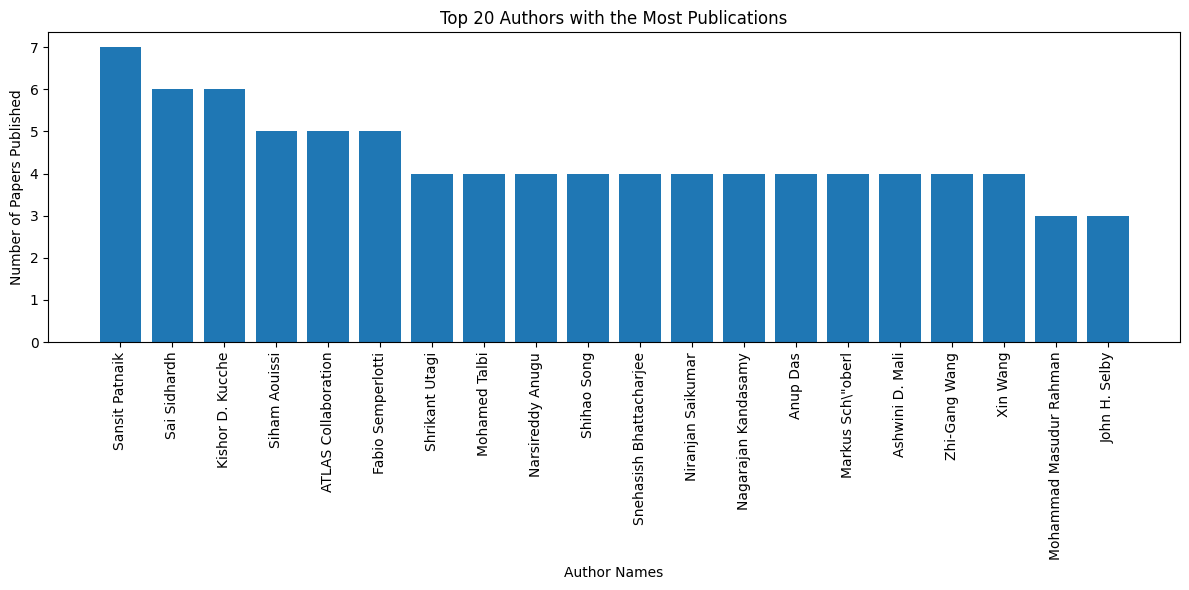

In [84]:
# Plot the graph using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(top_authors.index, top_authors.values)
plt.xlabel('Author Names')
plt.ylabel('Number of Papers Published')
plt.title(f'Top {N} Authors with the Most Publications')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [86]:
provider['update_date'] = pd.to_datetime(provider['update_date'])

In [87]:
# Group the DataFrame by the 'update_date' and count the number of papers updated on each date
updates_by_date = provider['update_date'].value_counts().sort_index()


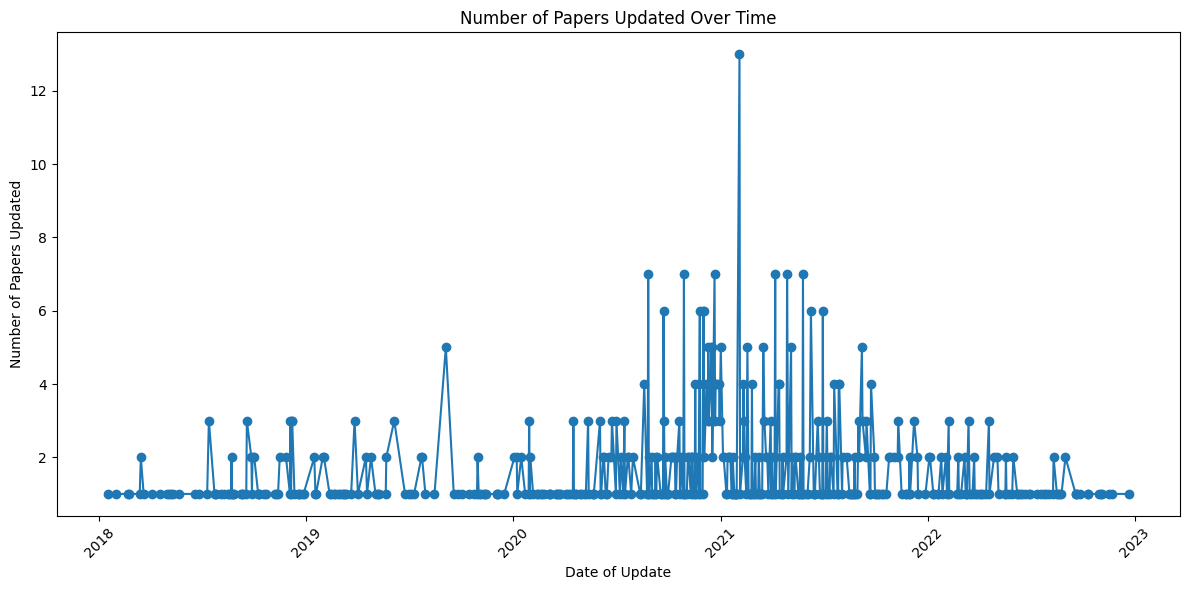

In [88]:
# Plot the graph using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(updates_by_date.index, updates_by_date.values, marker='o', linestyle='-')
plt.xlabel('Date of Update')
plt.ylabel('Number of Papers Updated')
plt.title('Number of Papers Updated Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()